# 0. Self Introduction  
Deep Facial Verification using Siamese Neural Network
------------------------------------------------------------------------------------------------------------------------
#### ***Final project for partial fulfilment of course Data Science at SCDE of Jawaharlal Nehru Technological University Hyderabad.***
________________________________________________________________________________________________________________________


Project by: ***Narra SuryaKoushik Reddy***

E-Mail:  ***narrasuryakoushikreddy@gmail.com***

Project Report: Yet to compleate


# 1. Setup

## 1.1 Installing Dependencies'

only install this dependencies if you don't have them ***(I have already installed them in the beginning)***

In [1]:
# pip install tensorflow 

In [2]:
# pip install tensorflow-gpu

In [3]:
# pip install opencv-python

In [4]:
# pip install matplotlib

## 1.2 Import Dependencies

In [5]:
# import standard dependencies 
import cv2
import os
import random #optional but i imported it just in case
import numpy as np
from matplotlib import pyplot as plt

# importhing tensorflow dependencies 
# tensorflow functional API is lot more flexible for hard DL models like SNN
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten 
import tensorflow as tf

2023-05-26 09:49:02.203549: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-26 09:49:02.205020: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 09:49:02.233988: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 09:49:02.234521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 09:49:02.745136: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## 1.3 Set GPU Growth

**Using my GPU to avoid Out Of Memory (OOM) errors by setting GPU Memory Consumption Growth**

In [6]:
tf.test.is_gpu_available() # just making sure Tensorflow is detecting my GPU if not we need to setup manually(pip install tensorflow-gpu)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
# setting up GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2023-05-26 09:49:08.980592: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 09:49:08.981369: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## 1.4 Create Folder Structures


In [7]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [8]:
# making the directories 
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# 2 Collect Positives and Anchors 

## 2.1 Untar Labelled Faces in the Wild Dataset 

***This data set is downloaded from the inter net and the link for that is in the Resources and References section***

In [9]:
# uncompressing TAR GZ Labelled faces in the Wild Dataset
!tar -xf lfw.tgz

In [10]:
# moving LFW images to the following repository data/negative

for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

## 2.2 Collecting Positive and Anchor Samples

In [11]:
# import UUID library to generate unique image names
import uuid

In [12]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())) # checking if the UUID is working

'data/anchor/7989c336-fb7c-11ed-b171-90e8685c3a0d.jpg'

In [13]:
# establishing a connection to the webcam
cap = cv2.VideoCapture(0) # i'm using inbuilt webcam (laptop cam) so it's '0'
while cap.isOpened():
    ret, frame = cap.read()
    
    #cutting down the frame to 250x250 pixels
    frame = frame[120:120+250, 200:200+250, :]
    
    # collectin anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'): # if we click 'a' it will collect a anchor
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame) # write out anchor image
    
    # collection positives
    if cv2.waitKey(1) & 0XFF == ord('p'): # if we click 'p' it will collect a positive
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame) # write out positive image
    
    # showing image back to screen
    cv2.imshow('capturing image', frame)
    
    # beaking greacefully (if we click 'q' the it should close the webcam window)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

        
# release the webcam (if something went wrong we can reset)
cap.release()

# close the image show window/frame
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread

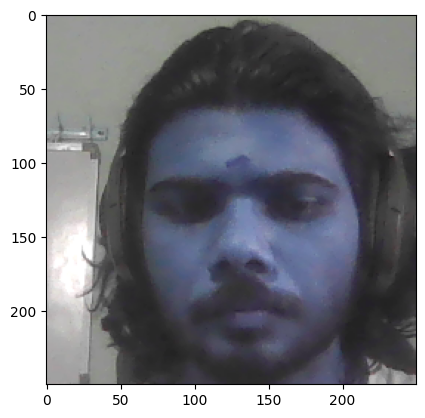

In [14]:
plt.imshow(frame)

## 2.3 Data Augmentation

In [15]:
def data_aug(img):
    img = tf.cast(img, tf.float32)
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        #img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(1,3))
        img = tf.image.stateless_random_flip_up_down(img, seed=(1,2))
        data.append(img)
    return data



In [16]:
import os
import uuid

In [17]:
img_path = os.path.join(ANC_PATH, 'b0a1ad92-fb7d-11ed-b171-90e8685c3a0d.jpg')
img = cv2.imread(img_path)
if img is not None:
    augmented_images = data_aug(img)
    for image in augmented_images:
        cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())
else:
    print('Failed to read image')


In [18]:
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img) 
    
    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

# 3. Images Loading and Preprocess

## 3.1 Get Image Directories

In [20]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)

In [21]:
ANC_PATH+'\*.jpg' # testing

'data/anchor\\*.jpg'

In [22]:
dir_test = anchor.as_numpy_iterator()  

2023-05-26 09:59:31.228096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [311]
	 [[{{node Placeholder/_0}}]]
2023-05-26 09:59:31.228300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [311]
	 [[{{node Placeholder/_0}}]]


In [23]:
abc = dir_test.next() # grabing a different image everytime we run

In [24]:
abc

b'data/anchor/b52815cc-fb7d-11ed-b171-90e8685c3a0d.jpg'

## 3.2 Preprocessing- Scale and Resize

In [25]:
def preprocess (file_path):
    byte_img = tf.io.read_file(file_path)  # reading the image
    img = tf.io.decode_jpeg(byte_img)      # loading the image
    img = tf.image.resize(img, (105,105))  # resizing the image to 105x105x3 same as in the research paper
    img = img / 255.0                      # scaling image to be b/w 0 and 1
    return img

In [26]:
img = preprocess(abc)

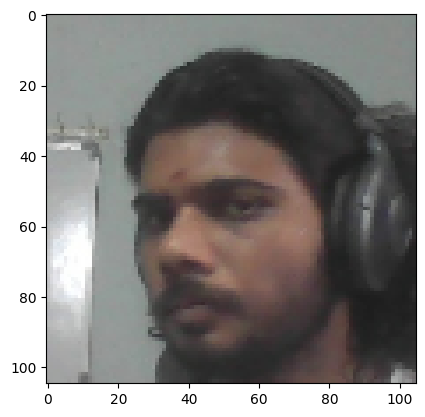

In [27]:
plt.imshow(img)

In [28]:
img.numpy().min()

0.11376774

In [29]:
img.numpy().max() # make sure it's not passing '1'

1.0

## 3.3 Create Labelled Dataset

In [30]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative)=> 0,0,0,0,0

In [31]:
tf.ones(len(anchor)) # effectively creating labelled positives

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [32]:
tf.zeros(len(anchor)) # effectively creating labelled negatives

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [33]:
# </ checking with an example
class_labels = tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))

In [34]:
iterator_labs = class_labels.as_numpy_iterator()

2023-05-26 09:59:35.028360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [300]
	 [[{{node Placeholder/_0}}]]


In [35]:
iterator_labs.next() # effectively looping through each lable in the class/>

0.0

In [36]:
# creating 2 different datasets for positives and negatives
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [37]:
sample = data.as_numpy_iterator()

2023-05-26 09:59:35.580282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_30' with dtype string and shape [13233]
	 [[{{node Placeholder/_30}}]]
2023-05-26 09:59:35.580870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_39' with dtype float and shape [300]
	 [[{{node Placeholder/_39}}]]


In [38]:
example = sample.next() # as of now it is not shuffled, we have to compleate all positive iterators to reach negatives

In [39]:
example

(b'data/anchor/bb819948-fb7d-11ed-b171-90e8685c3a0d.jpg',
 b'data/positive/de4a0406-fb7d-11ed-b171-90e8685c3a0d.jpg',
 1.0)

## 3.4 Train and Test Partitions 

In [40]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [41]:
result = preprocess_twin(*example) # '*' is to unpack the values of 'example'

In [42]:
result

(<tf.Tensor: shape=(105, 105, 3), dtype=float32, numpy=
 array([[[0.5822618 , 0.59010494, 0.58618337],
         [0.5753435 , 0.5915899 , 0.5873883 ],
         [0.5779534 , 0.6014828 , 0.5936397 ],
         ...,
         [0.5222222 , 0.5538749 , 0.543324  ],
         [0.5082833 , 0.5433173 , 0.53163934],
         [0.51101774, 0.55172735, 0.5372549 ]],
 
        [[0.58646125, 0.5951447 , 0.5903828 ],
         [0.5803922 , 0.59689873, 0.59187675],
         [0.5768774 , 0.6004068 , 0.5887089 ],
         ...,
         [0.51994795, 0.56607306, 0.5410497 ],
         [0.51064426, 0.5610644 , 0.5338935 ],
         [0.5140056 , 0.56442577, 0.5372549 ]],
 
        [[0.57701975, 0.5966276 , 0.5809413 ],
         [0.5787448 , 0.6002801 , 0.58459383],
         [0.58431375, 0.60784316, 0.5921569 ],
         ...,
         [0.53058785, 0.5560602 , 0.5394024 ],
         [0.5292584 , 0.55160064, 0.535761  ],
         [0.5311858 , 0.5529412 , 0.5372549 ]],
 
        ...,
 
        [[0.62530345, 0.62530345

In [43]:
result[0]

<tf.Tensor: shape=(105, 105, 3), dtype=float32, numpy=
array([[[0.5822618 , 0.59010494, 0.58618337],
        [0.5753435 , 0.5915899 , 0.5873883 ],
        [0.5779534 , 0.6014828 , 0.5936397 ],
        ...,
        [0.5222222 , 0.5538749 , 0.543324  ],
        [0.5082833 , 0.5433173 , 0.53163934],
        [0.51101774, 0.55172735, 0.5372549 ]],

       [[0.58646125, 0.5951447 , 0.5903828 ],
        [0.5803922 , 0.59689873, 0.59187675],
        [0.5768774 , 0.6004068 , 0.5887089 ],
        ...,
        [0.51994795, 0.56607306, 0.5410497 ],
        [0.51064426, 0.5610644 , 0.5338935 ],
        [0.5140056 , 0.56442577, 0.5372549 ]],

       [[0.57701975, 0.5966276 , 0.5809413 ],
        [0.5787448 , 0.6002801 , 0.58459383],
        [0.58431375, 0.60784316, 0.5921569 ],
        ...,
        [0.53058785, 0.5560602 , 0.5394024 ],
        [0.5292584 , 0.55160064, 0.535761  ],
        [0.5311858 , 0.5529412 , 0.5372549 ]],

       ...,

       [[0.62530345, 0.62530345, 0.62530345],
        [0.62

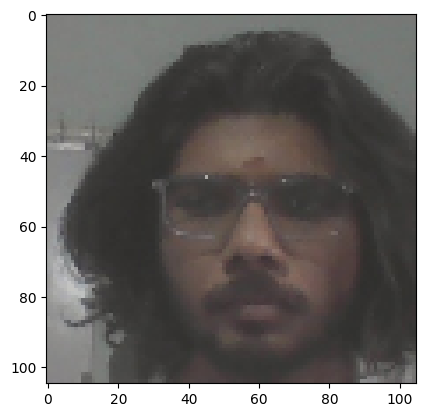

In [44]:
plt.imshow(result[1])

In [45]:
result[2]

1.0

In [46]:
# building dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024) # shuffling the data

In [47]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [48]:
data.as_numpy_iterator()

2023-05-26 09:59:38.774202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_30' with dtype string and shape [13233]
	 [[{{node Placeholder/_30}}]]
2023-05-26 09:59:38.774768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_30' with dtype string and shape [13233]
	 [[{{node Placeholder/_30}}]]


In [49]:
samples = data.as_numpy_iterator()

In [50]:
samples.next()

(array([[[0.58636564, 0.58636564, 0.58636564],
         [0.5771242 , 0.58552754, 0.581606  ],
         [0.5743119 , 0.5899982 , 0.5860766 ],
         ...,
         [0.5329598 , 0.54509807, 0.5411765 ],
         [0.52455646, 0.54024273, 0.53632116],
         [0.5269841 , 0.54267037, 0.5387488 ]],
 
        [[0.58067894, 0.5890823 , 0.58516073],
         [0.57511   , 0.5840336 , 0.58011204],
         [0.5686275 , 0.58431375, 0.5803922 ],
         ...,
         [0.537535  , 0.54537815, 0.54089636],
         [0.5266106 , 0.5419968 , 0.5372549 ],
         [0.5254902 , 0.54901963, 0.5406163 ]],
 
        [[0.5674025 , 0.5866369 , 0.5809413 ],
         [0.564986  , 0.58422035, 0.5785247 ],
         [0.57335156, 0.5925859 , 0.5868903 ],
         ...,
         [0.5340803 , 0.5509626 , 0.53645235],
         [0.52791786, 0.5492997 , 0.53361344],
         [0.52267796, 0.54620737, 0.5305211 ]],
 
        ...,
 
        [[0.63529414, 0.63529414, 0.63529414],
         [0.63529414, 0.63529414, 0.63529

In [51]:
samp = samples.next()

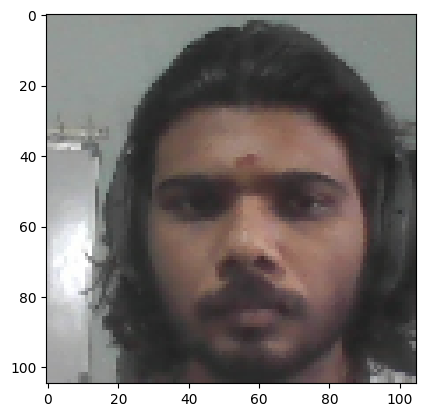

In [52]:
plt.imshow(samp[0])

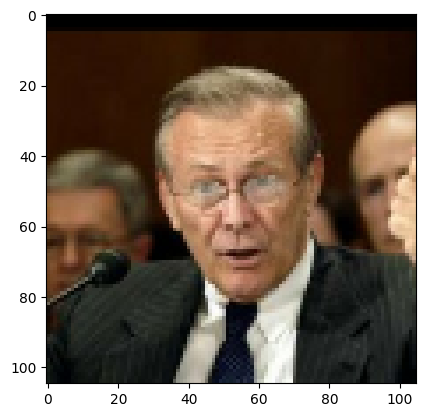

In [53]:
plt.imshow(samp[1])

In [54]:
samp[2]

0.0

In [55]:
round(len(data)*.7)

420

In [56]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [57]:
# creating training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [58]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [59]:
train_samples = train_data.as_numpy_iterator()

2023-05-26 09:59:41.101065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_30' with dtype string and shape [13233]
	 [[{{node Placeholder/_30}}]]
2023-05-26 09:59:41.101668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype string and shape [3020]
	 [[{{node Placeholder/_9}}]]


In [60]:
train_sample = train_samples.next()

In [61]:
len(train_sample[0])

16

In [62]:
# creating testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Engineering 

# 4.1 Build Embedding Layer

In [63]:
def make_embedding():
    inp = Input(shape=(105, 105, 3), name='input_image')
    
    # 1st block
    c1 = Conv2D(64,(10,10), activation = 'relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # 2nd block
    c2 = Conv2D(128, (7,7), activation = 'relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding= 'same')(c2)
    
    # 3rd block
    c3 = Conv2D(128, (4,4), activation = 'relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding= 'same')(c3)
    
    # 4th / final embedding block
    c4 = Conv2D(256, (4,4), activation= 'relu')(m3)
    f1 = Flatten()(c4)                              # flatenning the output
    d1 = Dense(4096, activation= 'sigmoid')(f1)     # making the flatten layer to a dense layer
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [64]:
embedding = make_embedding()

In [65]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 105, 105, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       26

## 4.2 Build Distance Layer

In [66]:
class L1Dist(Layer):               # siamese L1 distance class 
     
    def __init__(self, **kwargs):  # inheritance 
        super().__init__()
        
    # similarity calculation     
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [67]:
l1 = L1Dist()

In [68]:
l1

## 4.3 Make Siamese Model

In [69]:
input_image = Input(name= 'input_img', shape= (105,105,3)) 
validation_image = Input(name= 'validation_img', shape = (105,105,3))

In [70]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [71]:
inp_embedding

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [72]:
val_embedding

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [73]:
siamese_layer = L1Dist()

In [74]:
distances = siamese_layer(inp_embedding, val_embedding)

In [75]:
classsifier = Dense(1, activation='sigmoid')(distances)

In [76]:
classsifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

In [77]:
def make_siamese_model():
    
    input_image = Input(name= 'input_img', shape= (105,105,3)) # anchor image in the network
    validation_image = Input(name= 'validation_img', shape = (105,105,3)) # validation image in the network
    
    
    # combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # clasification layer
    classsifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs= classsifier, name='SiameseNetwork')

In [78]:
siamese_model = make_siamese_model()

In [79]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 5. Training Model

## 5.1 Setup Loss and Optimizer

In [80]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [81]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [82]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model= siamese_model)

## 5.3 Build Train Step Function 

In [83]:
test_batch = train_data.as_numpy_iterator()

In [84]:
batch_1 = test_batch.next()

In [85]:
len(batch_1)

3

In [86]:
batch_1 = test_batch.next()

In [87]:
X = batch_1[:2]

In [88]:
np.array(X).shape

(2, 16, 105, 105, 3)

In [89]:
Y = batch_1[2]

In [90]:
Y

array([0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.],
      dtype=float32)

In [91]:
@tf.function
def train_step(batch):
    
    with tf.GradientTape() as tape:
        
        X = batch[:2] # get anchor and positive/negative image
        
        Y = batch[2] # get label
        
        
        # forwoard pass
        yhat = siamese_model(X, training= True)
        
        # calculate losss
        loss = binary_cross_loss(Y, yhat)
    print(loss)
        
    # calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad,siamese_model.trainable_variables))
    
    return loss

    pass

## 5.4 Build Training Loop

In [92]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [93]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

## 5.5 Train the model

In [94]:
EPOCHS = 50

In [95]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 40s 1s/step
0.056189932 0.92537314 0.9893617

 Epoch 2/50
27/27 [==============================] - 39s 1s/step
0.008811635 0.98623854 1.0

 Epoch 3/50
27/27 [==============================] - 38s 1s/step
0.00011113278 1.0 1.0

 Epoch 4/50
27/27 [==============================] - 38s 1s/step
6.374998e-05 1.0 1.0

 Epoch 5/50
27/27 [==============================] - 38s 1s/step
0.10924246 1.0 1.0

 Epoch 6/50
1/1 [==============================] - 0s 308ms/step


27/27 [==============================] - 38s 1s/step
3.1517113e-05 1.0 1.0

 Epoch 7/50
27/27 [==============================] - 38s 1s/step
6.628481e-05 1.0 1.0

 Epoch 8/50
27/27 [==============================] - 38s 1s/step
0.024265325 1.0 1.0

 Epoch 9/50
27/27 [==============================] - 39s 1s/step
0.13678963 0.98067635 0.9902439

 Epoch 10/50
27/27 [==============================] - 38s 1s/step
0.004839355 1.0 1.0

 Epoch 11/50
1/1 [==============================] - 0s 304ms/step


27/27 [==============================] - 38s 1s/step
0.0026055784 1.0 1.0

 Epoch 12/50
27/27 [==============================] - 38s 1s/step
1.9118563e-05 1.0 1.0

 Epoch 13/50
27/27 [==============================] - 38s 1s/step
2.5183017e-06 1.0 1.0

 Epoch 14/50
27/27 [==============================] - 38s 1s/step
0.0004521578 1.0 1.0

 Epoch 15/50
27/27 [==============================] - 38s 1s/step
1.0743895e-05 1.0 1.0

 Epoch 16/50
27/27 [==============================] - 38s 1s/step


8.590427e-05 1.0 1.0

 Epoch 17/50
27/27 [==============================] - 38s 1s/step
3.799813e-06 1.0 1.0

 Epoch 18/50
27/27 [==============================] - 38s 1s/step
0.00017777579 1.0 1.0

 Epoch 19/50
27/27 [==============================] - 38s 1s/step
4.3958685e-06 1.0 1.0

 Epoch 20/50
27/27 [==============================] - 39s 1s/step
2.5481072e-06 1.0 1.0

 Epoch 21/50
27/27 [==============================] - 38s 1s/step
0.00017181538 1.0 1.0

 Epoch 22/50
1/1 [==============================] - 0s 299ms/step


27/27 [==============================] - 38s 1s/step
3.9356666e-05 1.0 1.0

 Epoch 23/50
27/27 [==============================] - 38s 1s/step
3.2931666e-06 1.0 1.0

 Epoch 24/50
27/27 [==============================] - 38s 1s/step
2.875932e-06 1.0 1.0

 Epoch 25/50
27/27 [==============================] - 38s 1s/step
5.2154087e-07 1.0 1.0

 Epoch 26/50
27/27 [==============================] - 38s 1s/step
1.926793e-05 1.0 1.0

 Epoch 27/50
1/1 [==============================] - 0s 304ms/step


27/27 [==============================] - 38s 1s/step
0.00011947597 1.0 1.0

 Epoch 28/50
27/27 [==============================] - 38s 1s/step
1.1920946e-06 1.0 1.0

 Epoch 29/50
27/27 [==============================] - 38s 1s/step
1.3411046e-07 1.0 1.0

 Epoch 30/50
27/27 [==============================] - 39s 1s/step
7.450585e-07 1.0 1.0

 Epoch 31/50
27/27 [==============================] - 38s 1s/step
1.2666003e-06 1.0 1.0

 Epoch 32/50
27/27 [==============================] - 38s 1s/step
6.258491e-07 1.0 1.0

 Epoch 33/50
1/1 [==============================] - 0s 301ms/step


27/27 [==============================] - 38s 1s/step
4.8237413e-05 1.0 1.0

 Epoch 34/50
27/27 [==============================] - 38s 1s/step
1.0430813e-07 1.0 1.0

 Epoch 35/50
27/27 [==============================] - 38s 1s/step
1.4454533e-05 1.0 1.0

 Epoch 36/50
27/27 [==============================] - 38s 1s/step
2.9802322e-08 1.0 1.0

 Epoch 37/50
27/27 [==============================] - 38s 1s/step
1.4156499e-05 1.0 1.0

 Epoch 38/50
1/1 [==============================] - 0s 303ms/step


27/27 [==============================] - 38s 1s/step
1.52442835e-05 1.0 1.0

 Epoch 39/50
27/27 [==============================] - 38s 1s/step
1.20105915e-05 1.0 1.0

 Epoch 40/50
27/27 [==============================] - 39s 1s/step
0.0 1.0 1.0

 Epoch 41/50
27/27 [==============================] - 38s 1s/step
2.9802322e-08 1.0 1.0

 Epoch 42/50
27/27 [==============================] - 38s 1s/step
1.639128e-07 1.0 1.0

 Epoch 43/50
1/1 [==============================] - 0s 318ms/step


27/27 [==============================] - 39s 1s/step
2.9802322e-08 1.0 1.0

 Epoch 44/50
27/27 [==============================] - 38s 1s/step
4.4852873e-06 1.0 1.0

 Epoch 45/50
27/27 [==============================] - 38s 1s/step
2.0861633e-07 1.0 1.0

 Epoch 46/50
27/27 [==============================] - 38s 1s/step
4.4703487e-08 1.0 1.0

 Epoch 47/50
27/27 [==============================] - 39s 1s/step
1.1920932e-07 1.0 1.0

 Epoch 48/50
27/27 [==============================] - 38s 1s/step
2.9802322e-08 1.0 1.0

 Epoch 49/50
1/1 [==============================] - 0s 304ms/step


27/27 [==============================] - 38s 1s/step
4.1723547e-06 1.0 1.0

 Epoch 50/50
27/27 [==============================] - 39s 1s/step
1.6391282e-07 1.0 1.0


# 6. Evaluate Model

## 6.1 Import Metrics

In [96]:
# import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions 

In [97]:
# get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

2023-05-26 10:31:53.442696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype float and shape [300]
	 [[{{node Placeholder/_18}}]]
2023-05-26 10:31:53.443140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_39' with dtype float and shape [300]
	 [[{{node Placeholder/_39}}]]


In [98]:
test_var = test_data.as_numpy_iterator().next()

In [99]:
test_var[2]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.],
      dtype=float32)

In [100]:
y_true

array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.],
      dtype=float32)

In [101]:
# predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 0s 298ms/step


array([[1.0000000e+00],
       [1.0000000e+00],
       [2.8399708e-07],
       [8.6050328e-08],
       [1.0000000e+00],
       [8.6433653e-07],
       [4.1240259e-08],
       [1.4265764e-05],
       [8.9842437e-08],
       [6.3369621e-06],
       [9.9999809e-01],
       [1.0000000e+00],
       [9.5334990e-08],
       [1.0323652e-06],
       [1.0000000e+00],
       [9.2817302e-08]], dtype=float32)

In [102]:
# post processing the results
res = []
for prediction in y_hat:
    if prediction > 0.9:
        res.append(1)
    else:
        res.append(0)
res

[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]

In [103]:
y_true

array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.],
      dtype=float32)

## 6.3 Calculate Metrics

In [104]:
# creating a metric object with Recall
m = Recall()

# calculating the recall value
m.update_state(y_true, y_hat)

# recall result
m.result().numpy()

1.0

In [105]:
# creating a metric object with Precision
m = Precision()

# calculating the recall value
m.update_state(y_true, y_hat)

# recall result
m.result().numpy()

1.0

## 6.4 Visualizing results  

<function matplotlib.pyplot.show(close=None, block=None)>

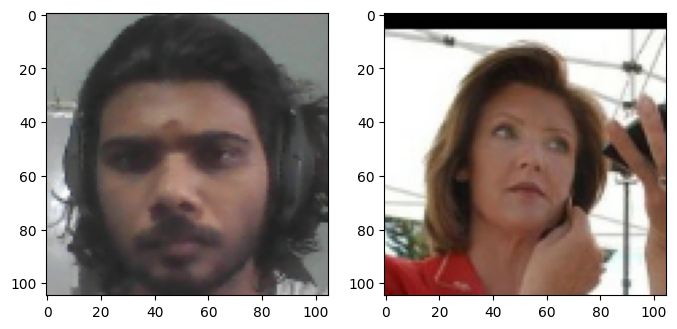

In [106]:
plt.figure(figsize=(8,5))  # plot size

# first sub plot
plt.subplot(1,2,1)
plt.imshow(test_input[9])   # res indexing image references

# second sub plot
plt.subplot(1,2,2)
plt.imshow(test_val[9])     # y_true indexing image references 

# rendering 
plt.show

# 7. Save Model

In [107]:
# save weight
siamese_model.save('SiameseModel.h5')

In [108]:
# reload model
model = tf.keras.models.load_model('SiameseModel.h5',
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [109]:
# make predictions with reloaded model
model.predict([test_input, test_val])

1/1 [==============================] - 0s 358ms/step


array([[1.0000000e+00],
       [1.0000000e+00],
       [2.8399708e-07],
       [8.6050328e-08],
       [1.0000000e+00],
       [8.6433653e-07],
       [4.1240259e-08],
       [1.4265764e-05],
       [8.9842437e-08],
       [6.3369621e-06],
       [9.9999809e-01],
       [1.0000000e+00],
       [9.5334990e-08],
       [1.0323652e-06],
       [1.0000000e+00],
       [9.2817302e-08]], dtype=float32)

In [110]:
model.summary() # model summary

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 8. Real Time Test

## 8.1 Verification Function

- I have created 1 main folder 'application_data' and 2 sub folders 'input_image' and 'verification_images inside 'application_data'

- I have also copied 50 positive samples from 'POS_PATH' to 'verification_images' 

- We will save our live input image to 'input_image' folder and compare it with our positive samples in 'verification_images' 

- For better accuracy we will only verify the input image when it is matched more then 60% of the images in 'verification_images'

In [111]:
len(os.listdir(os.path.join('application_data', 'verification_images')))

51

In [112]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

## 8.2 OpenCV Real Time Verification

In [113]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
 

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.7, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread (0x729d270).
Cannot move to target thread (0x6a7a000)

QObject::moveToThread: Current thread (0x6a7a000) is not the object's thread

1/1 [==============================] - 0s 52ms/step
False
1/1 [==============================] - 0s 50ms/step
True
1/1 [==============================] - 0s 51ms/step
True
1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 55ms/step
False
1/1 [==============================] - 0s 56ms/step
False
1/1 [==============================] - 0s 59ms/step
False
1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 51ms/step
False
